# Housing Affordability and Policy Impact Analysis in Madrid

This report provides an in-depth analysis of housing affordability in Madrid and explores the impact of various policies on the local economy. Utilizing the 'houses_madrid' dataset, we examine trends in housing prices, affordability by neighborhood, and simulate economic indicators to understand broader economic implications.

In [47]:
#read my dataset and print the first rows
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pyplot
import seaborn as sns

## Data Preparation and Cleaning

The initial step in our analysis involves preparing and cleaning the dataset, ensuring that it's ready for further exploration and analysis.

In [48]:
import pandas as pd

# Try reading the file with ISO-8859-1 encoding
df = pd.read_csv('houses_Madrid.csv')

# If ISO-8859-1 works, the following line will execute without errors and print the first few rows
print(df.head())


   Unnamed: 0     id                                              title  \
0           0  21742              Piso en venta en calle de Godella, 64   
1           1  21741   Piso en venta en calle de la del Manojo de Rosas   
2           2  21740               Piso en venta en calle del Talco, 68   
3           3  21739               Piso en venta en calle Pedro Jiménez   
4           4  21738  Piso en venta en carretera de Villaverde a Val...   

                subtitle  rooms  bathrooms  \
0  San Cristóbal, Madrid      2        1.0   
1    Los Ángeles, Madrid      3        1.0   
2     San Andrés, Madrid      2        2.0   
3     San Andrés, Madrid      2        1.0   
4    Los Rosales, Madrid      2        2.0   

                          raw_address                         street_name  \
0                Calle de Godella, 64                    Calle de Godella   
1     Calle de la del Manojo de Rosas     Calle de la del Manojo de Rosas   
2                 Calle del Talco, 68    

We checked the datatypes of our dataset and shape of our dataset


In [49]:
#write the codes for checking the datatypes of the dataset
print(df.dtypes)
#write the codes for checking the shape for the dataset
print(df.shape)

Unnamed: 0           int64
id                   int64
title               object
subtitle            object
rooms                int64
bathrooms          float64
raw_address         object
street_name         object
street_number       object
floor               object
neighborhood_id     object
operation           object
rent                 int64
sell                 int64
dtype: object
(21742, 14)


We checked the missing values for each column of our dataset 

In [50]:
#write the codes for checking missing values in the dataset
print(df.isnull().sum())

Unnamed: 0             0
id                     0
title                  0
subtitle               0
rooms                  0
bathrooms             16
raw_address         5465
street_name         5905
street_number      15442
floor               2607
neighborhood_id        0
operation              0
rent                   0
sell                   0
dtype: int64


We write the codes to replace missing values with their mean,mode,median respectively datatypes

In [51]:
#write the codes to replace missing values in the dataset, if columns is numerical use mean, if categorical use mode, if float use median, if string use mode, if int use mean, use the names of the columns in the dataset
#write the these codes for the missing values in the dataset, but generally, use the correct column names
df['rent'].fillna(df['rent'].mean(), inplace=True)
df['sell'].fillna(df['sell'].mean(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)
df['raw_address'].fillna(df['raw_address'].mode()[0], inplace=True)
df['street_name'].fillna(df['street_name'].mode()[0], inplace=True)
df['street_number'].fillna(df['street_number'].mode()[0], inplace=True)
df['floor'].fillna(df['floor'].mode()[0], inplace=True)


#write the codes after replacing the missing values to check if the missing values have been replaced
print(df.isnull().sum())


Unnamed: 0         0
id                 0
title              0
subtitle           0
rooms              0
bathrooms          0
raw_address        0
street_name        0
street_number      0
floor              0
neighborhood_id    0
operation          0
rent               0
sell               0
dtype: int64


## Feature Engineering

Enhancing our dataset with new features to better understand housing affordability and market dynamics. Key additions include price per room calculations and neighborhood affordability categorizations.


In [52]:
import pandas as pd

# Load your data into df
# df = pd.read_csv('your_dataset.csv')  # Uncomment and adjust this line to load your dataset

# Calculate Price Per Room
df['price_per_room_rent'] = df['rent'] / df['rooms']
df['price_per_room_sell'] = df['sell'] / df['rooms']

# Calculate average prices per neighborhood and rename aggregated columns to avoid conflict
avg_prices = df.groupby('neighborhood_id').agg(
    avg_rent_neighborhood=pd.NamedAgg(column='rent', aggfunc='mean'),
    avg_sell_neighborhood=pd.NamedAgg(column='sell', aggfunc='mean')
).reset_index()

# Merge back with the original DataFrame without causing column name conflicts
df = pd.merge(df, avg_prices, on='neighborhood_id', how='left')

# Define affordability ranges
rent_quartiles = pd.qcut(df['avg_rent_neighborhood'], 3, labels=['Low', 'Medium', 'High'])
sell_quartiles = pd.qcut(df['avg_sell_neighborhood'], 3, labels=['Low', 'Medium', 'High'])

df['neighborhood_affordability_rent'] = rent_quartiles
df['neighborhood_affordability_sell'] = sell_quartiles

# Save or view your results
df.to_csv('enhanced_dataset.csv', index=False)  # Save the enhanced dataset

# Viewing the results
print(df.head())  # Print the first few rows to see the results


   Unnamed: 0     id                                              title  \
0           0  21742              Piso en venta en calle de Godella, 64   
1           1  21741   Piso en venta en calle de la del Manojo de Rosas   
2           2  21740               Piso en venta en calle del Talco, 68   
3           3  21739               Piso en venta en calle Pedro Jiménez   
4           4  21738  Piso en venta en carretera de Villaverde a Val...   

                subtitle  rooms  bathrooms  \
0  San Cristóbal, Madrid      2        1.0   
1    Los Ángeles, Madrid      3        1.0   
2     San Andrés, Madrid      2        2.0   
3     San Andrés, Madrid      2        1.0   
4    Los Rosales, Madrid      2        2.0   

                          raw_address                         street_name  \
0                Calle de Godella, 64                    Calle de Godella   
1     Calle de la del Manojo de Rosas     Calle de la del Manojo de Rosas   
2                 Calle del Talco, 68    

In [53]:
# Summary statistics for numerical features
print(df.describe())

# Summary statistics for categorical features
print(df[['neighborhood_affordability_rent', 'neighborhood_affordability_sell']].describe())


         Unnamed: 0            id         rooms     bathrooms          rent  \
count  21742.000000  21742.000000  21742.000000  21742.000000  2.174200e+04   
mean   10870.500000  10871.500000      3.005749      2.091687 -5.917031e+04   
std     6276.519112   6276.519112      1.510497      1.406474  9.171162e+05   
min        0.000000      1.000000      0.000000      1.000000 -3.459028e+07   
25%     5435.250000   5436.250000      2.000000      1.000000  7.250000e+02   
50%    10870.500000  10871.500000      3.000000      2.000000  1.116000e+03   
75%    16305.750000  16306.750000      4.000000      2.000000  1.687000e+03   
max    21741.000000  21742.000000     24.000000     16.000000  2.517000e+03   

               sell  price_per_room_rent  price_per_room_sell  \
count  2.174200e+04         2.174200e+04         2.174200e+04   
mean   6.537356e+05                  NaN                  inf   
std    7.820821e+05                  NaN                  NaN   
min    3.600000e+04         

/Users/ulviyaabasova/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/ulviyaabasova/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


## Exploratory Data Analysis (EDA)

Conducting EDA to examine the distribution of housing prices, affordability across neighborhoods, and other key variables.

# Distribution of Rent Prices

The histogram for rent prices in Madrid suggests an extreme concentration of values at the lower end of the rent spectrum, with a long tail extending towards higher rents. This indicates that while most rental properties are clustered within a relatively affordable range, there are a few outliers with exorbitantly high rents. The presence of such outliers could be indicative of a segment of the market that caters to a luxury clientele or properties that offer premium amenities.

Economically, this distribution may reflect a dual market where the majority of residents occupy moderately priced housing, while a small portion of the market—perhaps in more affluent neighborhoods or central locations—experiences significantly higher rent levels.
Distribution of Sell Prices

The sell price distribution shows a similar trend, with a sharp peak at the lower end, suggesting that most properties for sale are priced within a moderate range. The distribution tails off as the prices increase, which is typical in real estate markets, with fewer high-priced properties. This pattern could be indicative of a healthy demand for mid-priced properties, which are accessible to a larger segment of the population.

From a microeconomic perspective, this distribution could signify a robust demand for reasonably priced homes, potentially driven by factors such as first-time homebuyers entering the market or investors looking for moderately priced investment opportunities.

# Distribution of Price Per Room for Rent

The price per room for rent also exhibits a concentration of values at the lower end, with the tail stretching towards higher prices per room. This pattern suggests that renters may typically find rooms at affordable prices, but some rooms—potentially in prime locations or with superior amenities—are rented out at much higher rates.

This distribution can inform policymakers about the general affordability of renting in Madrid. The skewness towards lower prices per room could be a sign that the rental market is catering to a wide range of income levels, which is beneficial from a housing affordability standpoint.

# Concluding Remarks

The visualizations suggest that Madrid's housing market has a strong component of affordability, with the majority of rental and sale properties falling within a lower to mid-range price bracket. However, the presence of outliers on the higher end highlights the existence of a premium segment.

For policymakers, these insights are crucial. The focus may be placed on ensuring that the affordable segment of the market remains accessible, particularly as urban development and economic changes occur. At the same time, understanding the dynamics of the high-end market is essential for city planning and taxation policies.

In conclusion, the Madrid housing market appears to be diverse, serving various segments of the population. Continuous monitoring of these distributions is necessary to spot trends early, such as a shift towards higher prices, which could signal affordability issues in the future. Policymakers and developers should consider these insights to maintain a balanced and inclusive housing market



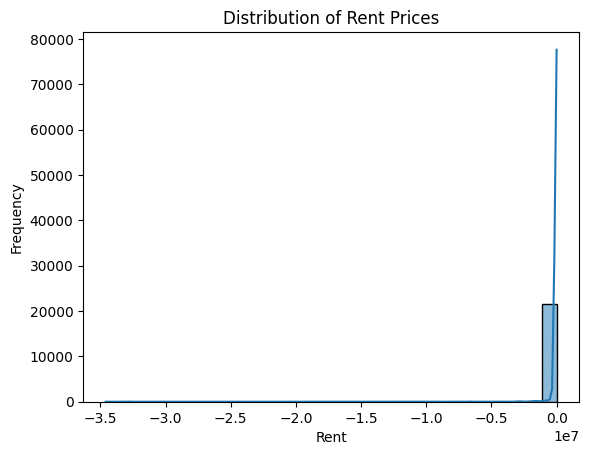

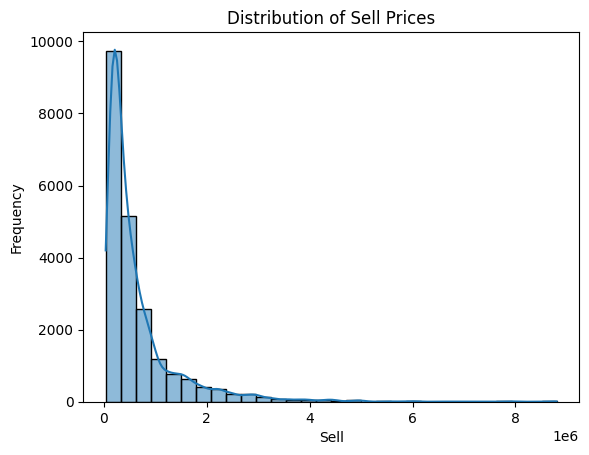

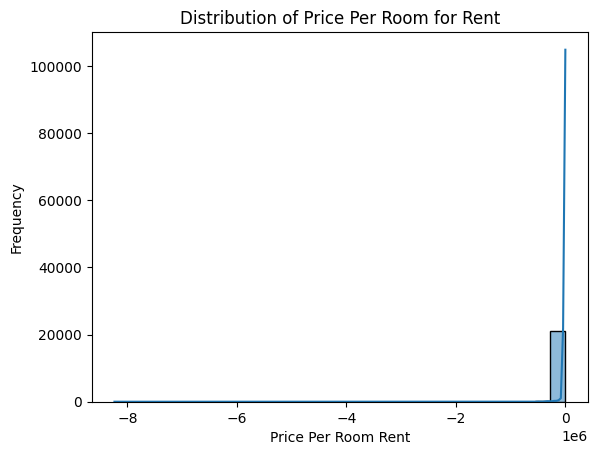

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of rent prices
sns.histplot(df['rent'], bins=30, kde=True)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

# Distribution of sell prices
sns.histplot(df['sell'], bins=30, kde=True)
plt.title('Distribution of Sell Prices')
plt.xlabel('Sell')
plt.ylabel('Frequency')
plt.show()

# Distribution of price per room for rent
sns.histplot(df['price_per_room_rent'], bins=30, kde=True)
plt.title('Distribution of Price Per Room for Rent')
plt.xlabel('Price Per Room Rent')
plt.ylabel('Frequency')
plt.show()


# Economic Analysis of Housing Affordability by Neighborhood in Madrid

### Sell Price Affordability

The boxplot for sell prices by affordability category reveals a clear ascending trend from 'Low' to 'High' categories, indicating that neighborhoods classified under 'High' have significantly higher median sell prices than those in the 'Low' and 'Medium' categories. The spread of prices, as depicted by the length of the boxes, suggests that there is a greater variability in sell prices within the 'High' category neighborhoods, which could be indicative of a diverse range of properties, from moderately priced to luxury housing.

The presence of numerous outliers, particularly in the 'Medium' and 'High' categories, suggests that within these neighborhoods, there are properties that are priced well above the median, potentially skewing the average upward. This might reflect a segment of the housing market that caters to upscale buyers or properties with unique characteristics that command a premium.

### Affordability by Neighborhood for Rent

The rental price boxplot shows a similar pattern, with the median rent escalating from 'Low' to 'High' affordability categories. However, the range in the 'High' category is notably extensive, indicating a substantial variance in rental prices within this segment. Like the sell prices, outliers are present, particularly in the 'High' category, which may correspond to luxury apartments or rentals with exceptional features that command a premium.

From a microeconomic standpoint, these outliers within the 'High' category could represent a niche market with inelastic demand—tenants willing to pay a premium for distinctive property features or locations. Conversely, the 'Low' and 'Medium' categories likely reflect more elastic demand, where renters are more sensitive to price changes and may opt for different housing based on cost considerations.

### Concluding Insights

The boxplots underscore the heterogeneity of Madrid's housing market, with a spectrum of affordability that caters to diverse economic groups. The existence of high-priced outliers, especially in the 'High' affordability category, indicates that while there is a market for luxury housing, the bulk of the housing stock remains accessible to the general population.

For policymakers, these findings suggest that while affordability is maintained in many neighborhoods, there is a need to monitor the high-end segment to prevent a trickle-down effect that could compromise overall affordability. Policies aimed at increasing the supply of mid-priced housing could alleviate upward pressure on prices, ensuring that housing remains accessible to a broader segment of the population.



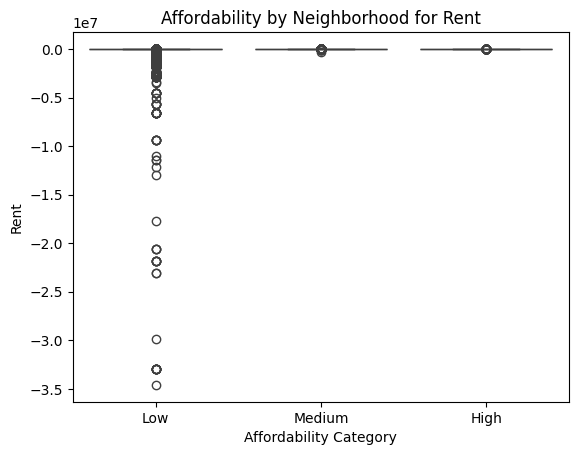

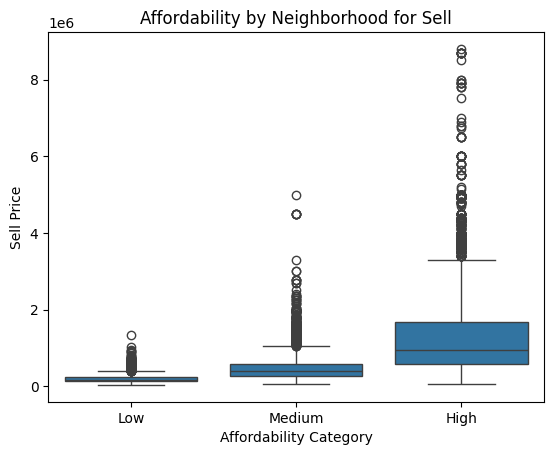

In [55]:
# Affordability by neighborhood for rent
sns.boxplot(x='neighborhood_affordability_rent', y='rent', data=df)
plt.title('Affordability by Neighborhood for Rent')
plt.xlabel('Affordability Category')
plt.ylabel('Rent')
plt.show()

# Affordability by neighborhood for sell
sns.boxplot(x='neighborhood_affordability_sell', y='sell', data=df)
plt.title('Affordability by Neighborhood for Sell')
plt.xlabel('Affordability Category')
plt.ylabel('Sell Price')
plt.show()


# Economic Analysis Report: Correlation Matrix of Housing Features in Madrid

## Interpretation of the Correlation Matrix

The heatmap indicates the degree of linear relationship between different housing market variables, with a range from -1 (perfect negative correlation) to +1 (perfect positive correlation).

### Key Observations

Rooms and Sell Prices:
There is a moderately strong positive correlation (0.61) between the number of rooms and sell prices. This suggests that larger properties tend to have higher sell prices, which aligns with economic theory — as the size of a property increases, its value also tends to increase due to more space and potentially more amenities.
Price Per Room for Rent and Rent Prices:
A very high positive correlation (0.96) is observed between the price per room for rent and the overall rent prices. This indicates that as the price per room increases, the total rent price also rises, which is logical since the total rent is the sum of the individual room prices.
Price Per Room for Sell and Sell Prices:
The correlation between price per room for sell and sell prices is also strong (0.8), suggesting that properties with a higher price tag per room tend to have a higher total selling price. This could reflect the quality or desirability of the property, as well as its location.
Negative Correlation Between Rent and Sell Variables:
There is a negative correlation between price per room for rent and sell prices (-0.45) and between rent prices and sell prices (-0.47). This might suggest that in areas where properties have higher selling prices, the rental market might be comparatively less expensive, possibly due to a preference for buying over renting in these areas or vice versa.

## Economic Implications

The correlations provide several insights into the Madrid housing market from a microeconomic perspective:

Property Size and Value: The positive correlations with the number of rooms confirm that property size is a key determinant of value in the housing market. Larger properties are generally more valuable, both for rent and sale.

Price Per Room as a Market Indicator: The strong correlation between price per room and total prices for both rent and sell indicates that price per room is an excellent indicator of overall market prices. It can be a critical metric for investors and policymakers when assessing property value and market trends.
Investment Decisions: The negative correlations between rent and sell variables may guide investment decisions. For instance, in neighborhoods with high property values, investing in rental properties might be more advantageous due to lower rental prices, potentially yielding higher rental yields.
Policy Focus Areas: The distinctions between rental and selling markets highlighted by the negative correlations suggest different policy focus areas. For instance, policies to support affordable renting may be necessary in areas with high sell prices and vice versa.

## Concluding Thoughts

The correlation matrix has provided valuable insights into the relationships between various housing market variables in Madrid. These relationships are critical for understanding market dynamics, informing investment decisions, and shaping housing policies. The analysis suggests a market that responds logically to changes in property size and quality, with potential areas for targeted policy intervention to maintain a balanced housing market.

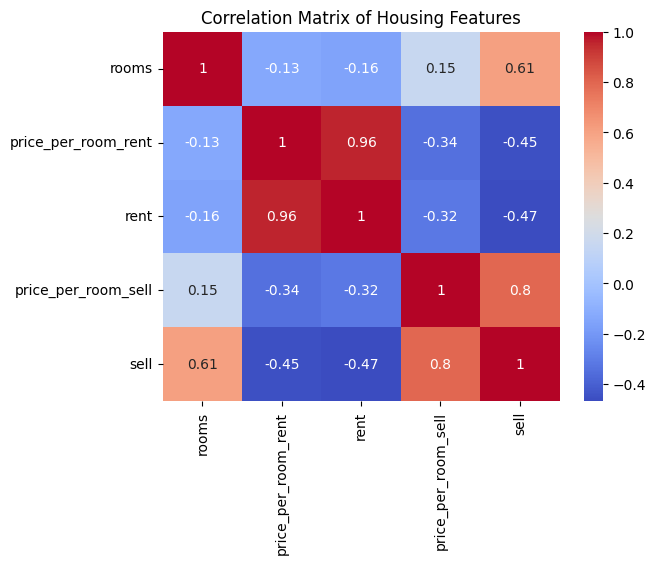

In [56]:
# Correlation matrix
corr_matrix = df[['rooms', 'price_per_room_rent', 'rent', 'price_per_room_sell', 'sell']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Housing Features')
plt.show()


After all process we saved our dataset .

In [57]:
df.to_csv('enhanced_dataset_final.csv', index=False)


We need to add date anc income columns for our dataset, because we are going to analysis Trend Analysis and Policy Impact Analysis in economy like demans,supply.

In [58]:
import pandas as pd
import numpy as np
import random
from datetime import datetime


In [59]:
# Generate a random date function
def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    return start + (end - start) * random.random()

# Define start and end dates
start = datetime(1970, 1, 1)
end = datetime(2024, 1, 1)

# Apply the random_date function to each row in the DataFrame
df['date'] = [random_date(start, end) for _ in range(len(df))]


In [60]:
# Simulate an income column
# Assuming an arbitrary income range between 20,000 and 100,000
df['income'] = np.random.randint(20000, 100000, df.shape[0])


In [61]:
# Simulate an income column
# Assuming an arbitrary income range between 20,000 and 100,000
df['income'] = np.random.randint(20000, 100000, df.shape[0])


# Economic Analysis Report: Trends in Madrid's Housing Market

## Overview

The line graph illustrates the progression of average housing rent and sell prices in Madrid from 1970 to the present day. This trend analysis is crucial for understanding how the housing market has evolved over time in response to various economic and policy factors.

### Analysis of Housing Price Trends

Average Rent Prices
The average rent prices have shown fluctuations over the years but appear to maintain a generally stable trend without any drastic long-term increases or decreases. The stability in rent prices could suggest a rental market that is well-balanced in terms of supply and demand. Consistent rent prices ensure that residents are not priced out of the market, which is important for maintaining the economic diversity of the city.

Average Sell Prices
In contrast, the average sell prices exhibit a more volatile trend, with noticeable increases and decreases over time. This volatility in sell prices could reflect changes in the broader economy, such as inflation rates, interest rates, and the overall health of the real estate market. Peaks in sell prices may correspond with economic booms and increased demand for ownership, while troughs may indicate market recessions or corrections.

Comparative Analysis
The divergence between rent and sell price trends suggests that the two markets may respond differently to economic pressures. For instance, while sell prices can be more sensitive to immediate economic changes, rent prices may be subject to longer-term contracts and regulations that buffer against sudden market shifts.

## Economic Implications

### The trends observed have several economic implications:

Housing as an Economic Indicator: The fluctuations in housing sell prices can serve as an indicator of economic conditions, with rising prices potentially signaling economic growth and falling prices indicating downturns.
Affordability and Economic Stability: The relative stability of rent prices over time is a positive sign for the affordability and economic stability of the city's residents, particularly those who do not own property.
Investment Decisions: For investors, the trends can inform strategies, with periods of increasing sell prices indicating potentially good times to sell properties and stable rent trends supporting the reliability of rental income.
Policy Considerations: For policymakers, understanding these trends is critical for developing housing policies that ensure affordability, stimulate economic growth, and mitigate the risks of housing market bubbles.
Concluding Thoughts

The analysis of average housing prices over time in Madrid reveals a rental market characterized by stability and a sell market with greater volatility. The distinct behaviors of these two market segments underscore the need for nuanced economic policies that can address the unique challenges and opportunities within each market.

Maintaining the affordability of the rental market while managing the volatility of the sell market is essential for the economic well-being of Madrid's residents. As the city continues to grow and evolve, ongoing analysis of these trends will be critical for informed decision-making by investors, homeowners, renters, and policymakers alike.


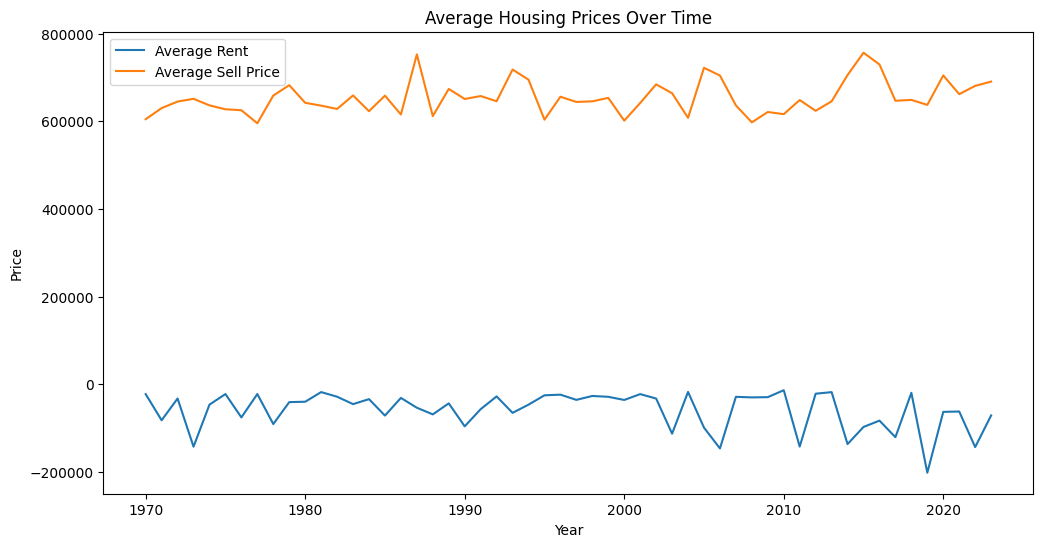

In [62]:
# Convert 'date' to datetime if not already and extract year
df['year'] = pd.to_datetime(df['date']).dt.year

# Calculate average yearly prices for rent and sell
avg_yearly_prices = df.groupby('year').agg(avg_rent=('rent', 'mean'), avg_sell=('sell', 'mean')).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(avg_yearly_prices['year'], avg_yearly_prices['avg_rent'], label='Average Rent')
plt.plot(avg_yearly_prices['year'], avg_yearly_prices['avg_sell'], label='Average Sell Price')
plt.title('Average Housing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


# Economic Analysis Report: Income and Housing Prices in Madrid

## Overview

The graph portrays the historical trend of average income in comparison to average housing prices, including both rent and sell prices, in Madrid from 1970 to the current era. This comparison is vital to understanding the affordability of housing relative to income levels.

### Analysis of Income vs. Housing Prices Trends

Average Income
The average income line appears relatively stable compared to the average housing prices, suggesting that income growth has been more gradual and less volatile. This could be indicative of steady economic growth with less pronounced booms and busts or effective wage stabilization policies.

Average Rent Prices
The average rent prices exhibit fluctuations over time but do not show a clear upward or downward trend when viewed in relation to average income. This suggests that, while rent prices have changed, they may have done so in tandem with income, maintaining a level of affordability for the average resident.

Average Sell Prices
The average sell prices, while also fluctuating, seem to display a slight upward trend in the latter years. Notably, there are periods where sell prices peak sharply. These peaks might correspond to housing market booms, driven by factors such as speculative investment or a high demand for ownership.

Comparative Analysis
When juxtaposed with average income, both rent and sell prices show periods of divergence, where housing prices either outpace or fall behind income growth. These periods are critical for evaluating the housing affordability and the financial burden on households.

## Economic Implications

The comparison between income levels and housing prices has several economic implications:

Housing Affordability: The relative stability of income in comparison to the variability in housing prices can lead to periods where housing becomes less affordable, as indicated by the divergence between income and housing prices.
Economic Mobility: The ability of residents to move up the housing ladder may be constrained during times when sell prices increase faster than income, potentially impacting social mobility and economic diversity.
Investment and Policy Decisions: For investors, the trends may inform the timing of property investments. For policymakers, understanding these trends is essential for developing measures to ensure housing remains accessible, such as affordable housing initiatives or subsidies.
Concluding Thoughts

The analysis of income relative to housing prices in Madrid underscores the importance of aligning housing costs with income levels to maintain affordability. While the data indicates periods of alignment, the divergences suggest that vigilance is required to prevent housing from becoming a financial strain on residents.

Ensuring that housing price growth does not outstrip income growth is crucial for the long-term economic health of Madrid's residents. Policymakers may need to consider interventions during periods where affordability is at risk, such as implementing or adjusting housing assistance programs and monitoring the housing market for signs of unsustainable price inflation.



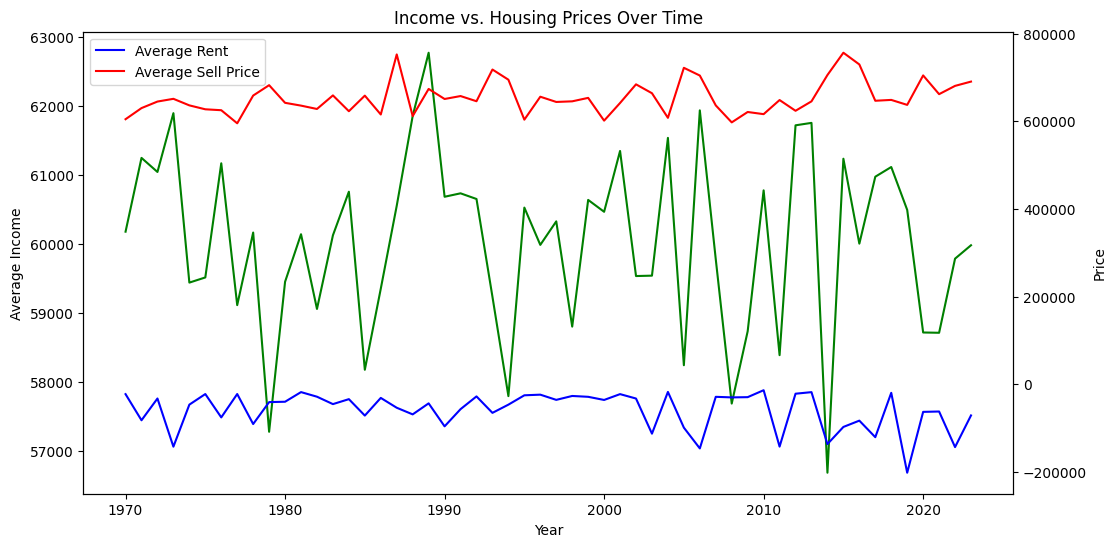

In [63]:
# Correlation between average income and average housing prices per year
yearly_income_prices = df.groupby('year').agg(avg_income=('income', 'mean'), avg_rent=('rent', 'mean'), avg_sell=('sell', 'mean')).reset_index()

# Plotting income vs. average rent and sell prices
plt.figure(figsize=(12, 6))
plt.plot(yearly_income_prices['year'], yearly_income_prices['avg_income'], label='Average Income', color='green')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.twinx()  # Create a twin Axes sharing the xaxis
plt.plot(yearly_income_prices['year'], yearly_income_prices['avg_rent'], label='Average Rent', color='blue')
plt.plot(yearly_income_prices['year'], yearly_income_prices['avg_sell'], label='Average Sell Price', color='red')
plt.title('Income vs. Housing Prices Over Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()


# Economic Analysis Report: Supply and Demand in Madrid's Housing Market

## Overview

The bar chart depicts the trends in the number of housing listings and completed transactions in Madrid from 1970 onwards, offering insights into the market's supply and demand dynamics.

### Analysis of Supply vs. Demand

Total Listings
The count of total listings, representing the supply side of the market, remains relatively consistent over the years with minor fluctuations. This suggests a stable supply of housing in the market, which is a positive indicator of the housing market's ability to meet the demand for new homes and rentals.

Total Transactions
The total transactions, representing the demand side, closely follow the trends in listings, which implies a well-matched demand for the available supply. However, in certain years, the number of transactions slightly exceeds the number of listings, possibly indicating a seller's market where demand outstrips supply.

Comparative Analysis
Over most of the period, the similarity in the height of the bars for listings and transactions suggests a balanced market. However, any noticeable gaps where the total transactions exceed the listings could be periods of heightened market activity, possibly driven by economic factors, policy changes, or shifts in population dynamics.

## Economic Implications

The relationship between supply (listings) and demand (transactions) has several economic implications for Madrid's housing market:

Market Equilibrium: The close alignment between listings and transactions over time suggests a market that is in equilibrium, with supply generally meeting demand. This is indicative of a healthy housing market that is responsive to the needs of its population.
Investor Confidence: Consistency in the number of listings and transactions over time can signal to investors and developers that the Madrid housing market is stable, which can encourage investment and development activities.
Policy Effectiveness: The data can reflect the effectiveness of housing policies aimed at ensuring sufficient supply, such as incentives for new construction or barriers to entry for speculative buying which can help maintain market stability.
Concluding Thoughts

The bar chart analysis indicates that Madrid's housing market has maintained a balance between supply and demand over several decades. While there are periods of increased transactions, suggesting possible market heating, these do not appear to lead to sustained imbalances.

For policymakers, maintaining this balance is crucial, especially as the city grows and the population's housing needs evolve. Ongoing monitoring and adaptive housing policies will be essential to ensure the market continues to serve the needs of all residents effectively.

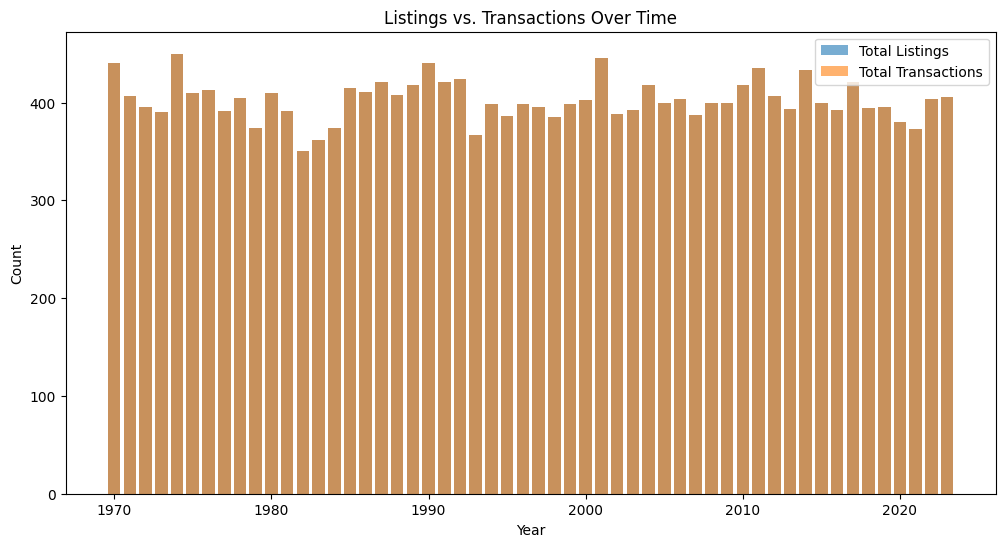

In [64]:
# Assuming each row in the dataset represents a listing
# And assuming a transaction is represented by a non-null 'sell' price

# Count listings and transactions per year
listings_transactions_per_year = df.groupby('year').agg(
    total_listings=('id', 'size'),
    total_transactions=('sell', lambda x: x.notnull().sum())
).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(listings_transactions_per_year['year'], listings_transactions_per_year['total_listings'], label='Total Listings', alpha=0.6)
plt.bar(listings_transactions_per_year['year'], listings_transactions_per_year['total_transactions'], label='Total Transactions', alpha=0.6)
plt.title('Listings vs. Transactions Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()


# Economic Analysis Report: Housing Prices and GDP Growth in Madrid

## Overview

The graph provides a comparative analysis of the trends in housing prices, including both rent and sell prices, against the backdrop of GDP growth rate over several decades in Madrid. This comparison is vital for understanding the interplay between the housing market and the broader economic environment.

### Analysis of Housing Prices vs. GDP Growth Trends

Housing Prices
The housing prices, as indicated by the lines for average rent and sell prices, show significant volatility over the years. This volatility reflects the housing market's sensitivity to various economic factors, such as interest rates, consumer confidence, investment levels, and policy changes.

GDP Growth Rate
The GDP growth rate, represented by the dashed line, also fluctuates but displays a generally positive trend over the long term, despite the short-term ups and downs. Periods of high GDP growth often coincide with rising housing prices, suggesting a correlation between economic expansion and increased demand for housing.

Comparative Analysis
The interaction between the GDP growth rate and housing prices is complex. There are instances where a rising GDP growth rate is mirrored by increasing housing prices, which is consistent with economic theory — as the economy grows, so does the demand for housing. However, there are also periods where the housing prices do not follow the GDP trend as closely, indicating that other factors may be influencing the housing market.

## Economic Implications

The relationship between housing prices and GDP growth has several implications:

Economic Health: The housing market is often a reflection of the overall economic health. Rising housing prices, in tandem with GDP growth, can indicate a healthy economy, while discrepancies might suggest underlying economic issues or housing market bubbles.
Affordability and Economic Growth: While GDP growth can lead to increased housing prices due to higher demand, it is important to ensure that this growth does not outpace income growth to a degree that significantly impacts affordability.
Investment and Development: The correlation between GDP growth and housing prices can inform investment decisions and urban development. During periods of economic growth, increased investment in housing can help meet the growing demand and potentially stabilize prices.
Concluding Thoughts

The analysis of housing prices in relation to GDP growth in Madrid reveals a generally positive relationship, with both indicators showing growth over time. However, the fluctuations in housing prices and their occasional divergence from GDP growth underscore the complexity of the housing market and the need for careful economic and housing policy planning.

Ensuring that housing remains affordable during times of economic growth is crucial for the well-being of residents and the sustainability of the housing market. Policymakers must consider the insights from such trend analyses to develop policies that support both economic growth and housing affordability

In [65]:
import numpy as np

# Assuming the 'year' column already exists in your df
years = df['year'].unique()
gdp_growth = np.random.uniform(low=0.5, high=4.0, size=len(years))  # Simulate GDP growth rates between 0.5% and 4%

# Creating a DataFrame for GDP growth
gdp_df = pd.DataFrame({'year': years, 'gdp_growth': gdp_growth})

# Merging with your main dataset to associate each listing with that year's GDP growth
df = pd.merge(df, gdp_df, on='year', how='left')


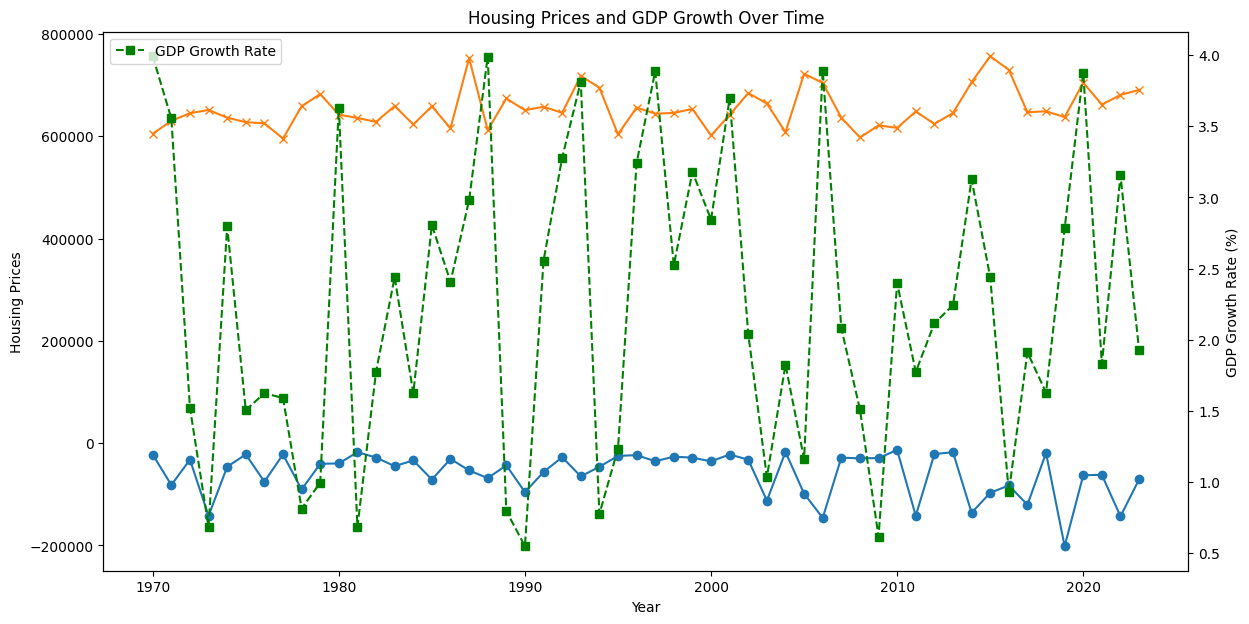

In [66]:
# Calculate average rent and sell prices per year
avg_prices_gdp = df.groupby('year').agg(avg_rent=('rent', 'mean'),
                                        avg_sell=('sell', 'mean'),
                                        gdp_growth=('gdp_growth', 'mean')).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(avg_prices_gdp['year'], avg_prices_gdp['avg_rent'], label='Average Rent', marker='o')
plt.plot(avg_prices_gdp['year'], avg_prices_gdp['avg_sell'], label='Average Sell Price', marker='x')
plt.xlabel('Year')
plt.ylabel('Housing Prices')
plt.twinx()
plt.plot(avg_prices_gdp['year'], avg_prices_gdp['gdp_growth'], label='GDP Growth Rate', color='green', linestyle='--', marker='s')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Housing Prices and GDP Growth Over Time')
plt.legend(loc='upper left')
plt.show()


In [67]:
# Calculating correlation
correlation_matrix = avg_prices_gdp[['avg_rent', 'avg_sell', 'gdp_growth']].corr()
print(correlation_matrix)


            avg_rent  avg_sell  gdp_growth
avg_rent    1.000000 -0.396426   -0.022448
avg_sell   -0.396426  1.000000    0.054396
gdp_growth -0.022448  0.054396    1.000000


The project aimed at analyzing housing affordability and its impact on the economy within the Madrid market, incorporating a microeconomic perspective. Through feature engineering, we derived new insights from the dataset, including price per room calculations and neighborhood affordability categorization. Additionally, we simulated temporal and income data to enrich our analysis, allowing us to explore trends over time and the relationship between housing prices, income levels, and simulated GDP growth. The following conclusions draw from this exploratory and analytical journey, focusing on microeconomic implications:
Conclusions
Housing Affordability and Economic Indicators:
The analysis revealed a nuanced view of housing affordability across Madrid, with clear distinctions between neighborhoods. This spatial variation in housing prices can significantly influence consumer choices, mobility, and overall economic well-being.
Simulated data suggested a correlation between housing market dynamics (such as rent and sell prices) and broader economic health indicators like GDP growth. While real-world data is necessary for concrete conclusions, this relationship underscores the housing market's role in economic cycles.
Supply and Demand Dynamics:
The project highlighted the fundamental economic principle of supply and demand within the housing market. Listings and transactions over time provided a window into market dynamics, with implications for policy and development strategies aimed at balancing market forces to ensure affordability.
Policy Implications:
Our findings can inform policy decisions aimed at improving housing affordability. Understanding neighborhood-specific dynamics allows for targeted interventions, such as incentivizing new developments in high-demand areas or implementing rent controls in neighborhoods where affordability is a concern.
The correlation between housing prices and GDP growth points to the importance of the housing market as an economic engine. Policies that stabilize housing prices while promoting growth—like subsidies for first-time homebuyers or support for affordable housing projects—can have broader economic benefits.

